<h1 align="center"> Лабораторная работа №5 </h1>

---

<h1 align="center"> Университет ИТМО </h1>
<h2 align="center"> Факультет систем управления и робототехники </h2>

---

### Выполнили:
- **Соколов Никита**  
- **Минеев Кирилл**
- **Соловьев Дмитрий**
- **Семёнов Евгений**

---

### Проверил:
- **Догадин Егор Витальевич**

---

### 1 декабря 2024 г.

---

# Подготовка.

### Установка необходимых библиотек:

In [93]:
!pip install numpy networkx scikit-learn

You should consider upgrading via the 'pip install --upgrade pip' command.


In [94]:
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans
from sympy import *

# Задание 1. Кластеризация социальной сети

**Количество вершин графа:**

In [179]:
n = 15

**Сгенерируем связный граф:**

In [180]:
G = nx.erdos_renyi_graph(n, 0.25, directed=False)

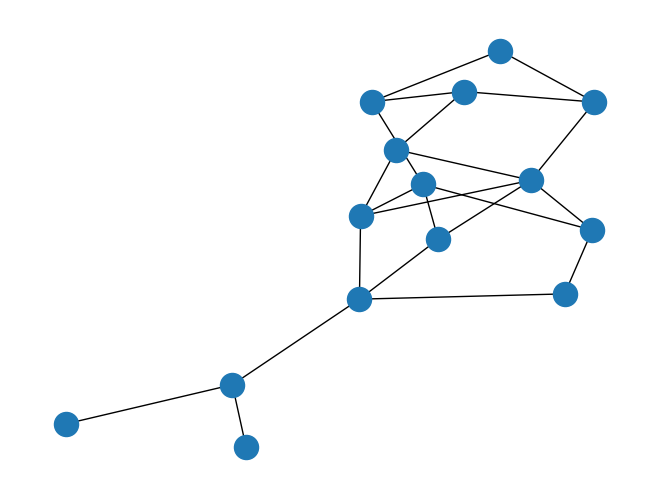

In [181]:
nx.draw(G, pos = nx.drawing.spring_layout(G))

**Матрица Лапласа для этого графа:**

Матрица Лапласа высчитывается по данной формуле $ L = D - A$, где D - это матрица степеней, а A - матрица смежности графа

In [182]:
laplace_matrix = np.matrix(nx.laplacian_matrix(G).toarray())
pprint(Matrix(laplace_matrix))

⎡1   -1  0   0   0   0   0   0   0   0   0   0   0   0   0 ⎤
⎢                                                          ⎥
⎢-1  3   -1  0   0   0   0   0   0   0   0   -1  0   0   0 ⎥
⎢                                                          ⎥
⎢0   -1  4   -1  0   0   0   -1  0   0   0   0   0   0   -1⎥
⎢                                                          ⎥
⎢0   0   -1  4   0   0   0   0   0   -1  -1  0   -1  0   0 ⎥
⎢                                                          ⎥
⎢0   0   0   0   3   0   -1  0   -1  -1  0   0   0   0   0 ⎥
⎢                                                          ⎥
⎢0   0   0   0   0   3   -1  0   -1  0   -1  0   0   0   0 ⎥
⎢                                                          ⎥
⎢0   0   0   0   -1  -1  2   0   0   0   0   0   0   0   0 ⎥
⎢                                                          ⎥
⎢0   0   -1  0   0   0   0   2   0   0   0   0   0   -1  0 ⎥
⎢                                                          ⎥
⎢0   0   0   0   -1  -1 

**Собственные числа и соответствующие им собственные вектора:**

In [183]:
eigen_values, eigen_vectors = np.linalg.eig(laplace_matrix)
idx = eigen_values.argsort()
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:,idx].transpose()

**Число компонент кластеризации графа:**

In [184]:
k = 3

**Матрица из k собственных векторов, соответствующих самым маленьким собственным числам:**

In [185]:
v = np.column_stack([np.asarray(eigen_vectors[i])[0] for i in range(k)])
v.shape

(15, 3)

**Применим метод k-means для кластеризации:**

Алгоритм KMeans — это метод кластеризации, который разделяет данные на k групп (кластеров) на основе схожести.

**Шаги работы:**
1) Инициализация: Случайным образом выбираются k точек — центры кластеров.
2) Присвоение точек: Каждая точка данных относится к ближайшему центру кластера (по евклидову расстоянию или другой метрике).
3) Обновление центров: Для каждого кластера пересчитывается его центр как среднее всех точек, принадлежащих этому кластеру.
4) Повторение: Шаги 2 и 3 повторяются, пока центры кластеров не перестанут меняться или не достигнется заданное число итераций.

**Итог:**
Каждая точка относится к одному из k кластеров, а кластеры сгруппированы так, чтобы минимизировать внутрикластерные различия и максимизировать различия между кластерами.



In [186]:
kmeans = KMeans(n_clusters=k, n_init='auto')
kmeans.fit(v)

KMeans(n_clusters=3, n_init='auto')

**Раскрасим исходный граф:**

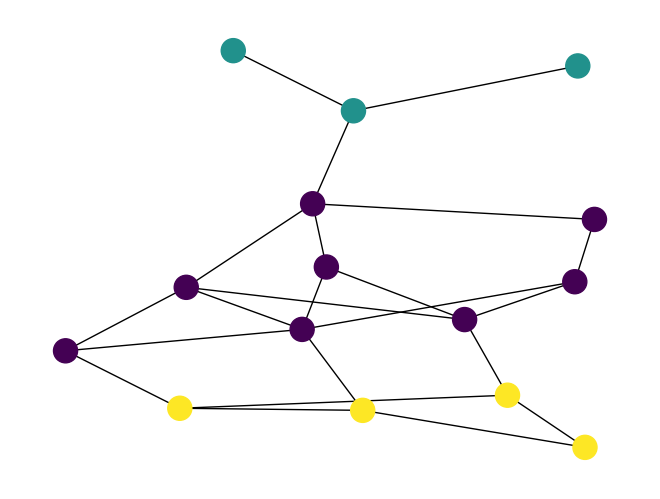

In [187]:
nx.draw(G, pos = nx.drawing.spring_layout(G), node_color = kmeans.labels_)

## Почему это работает?

**Матрица Лапласа** используется для анализа структуры графа. Второй собственный вектор с минимальным собственным значением, известный как **вектор Фидлера**, позволяет разделить граф на два кластера: вершины с положительными значениями принадлежат одному кластеру, с отрицательными — другому. Расширяя этот метод, можно использовать следующие собственные векторы для разделения на большее число кластеров. Для кластеризации в многомерных пространствах также подходит метод k-средних.

# Задание 2. Google PageRank алгоритм.

**Количество вершин и рёбер графа:**

In [113]:
n = 15
e = 25

**Сгенерируем связный ориентированный граф:**

In [114]:
G = nx.gnm_random_graph(n, e, directed = True)

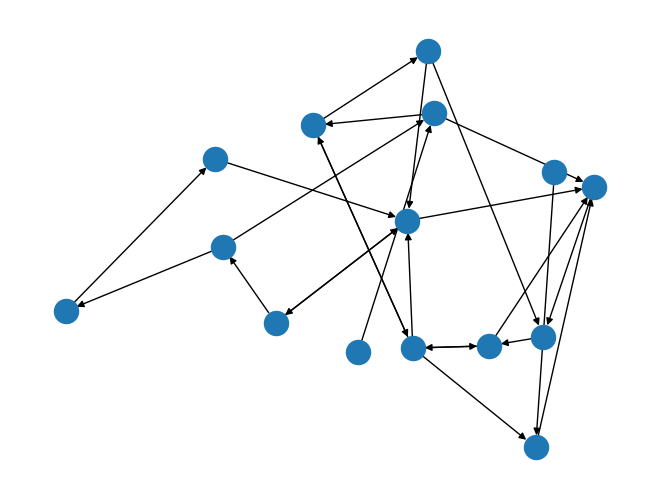

In [115]:
nx.draw(G, pos = nx.drawing.spring_layout(G))

**Составим матрицу смежности графа:**

In [119]:
adj = nx.adjacency_matrix(G).toarray()
pprint(Matrix(adj))

⎡0  0  0  0  0  1  1  0  0  0  0  0  1  1  0⎤
⎢                                           ⎥
⎢0  0  0  0  0  1  0  0  0  0  0  0  0  0  0⎥
⎢                                           ⎥
⎢0  0  0  0  0  0  0  0  0  1  0  0  0  0  0⎥
⎢                                           ⎥
⎢0  0  1  0  0  0  0  0  1  0  0  0  0  0  0⎥
⎢                                           ⎥
⎢0  0  0  0  0  0  0  0  0  0  1  0  0  0  0⎥
⎢                                           ⎥
⎢0  0  0  0  1  0  0  0  0  0  0  0  0  0  0⎥
⎢                                           ⎥
⎢1  0  0  0  0  0  0  0  0  0  0  1  0  0  0⎥
⎢                                           ⎥
⎢0  0  0  1  0  0  0  0  0  0  0  0  1  0  0⎥
⎢                                           ⎥
⎢0  0  0  0  1  0  1  0  0  0  0  0  0  0  0⎥
⎢                                           ⎥
⎢0  0  0  0  0  0  0  0  0  0  0  0  1  0  0⎥
⎢                                           ⎥
⎢0  0  0  0  0  0  0  0  0  0  0  0  0  1  0⎥
⎢                                 

**С помощью матрицы смежности, составим матрицу переходных вероятностей, рассматривая наш граф, как марковскую цепь:**

In [121]:
m = np.matrix([[adj[j][i] / sum(adj[j]) if adj[j][i]  else 0 for j in range(n)] for i in range(n)])
pprint(Matrix(m))

⎡0.0   0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.0⎤
⎢                                                                          ⎥
⎢0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢                                                                          ⎥
⎢0.0   0.0  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢                                                                          ⎥
⎢0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢                                                                          ⎥
⎢0.0   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.5  0.0  0.0  0.0  0.5  0.5  0.0⎥
⎢                                                                          ⎥
⎢0.25  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0⎥
⎢                                                                          ⎥
⎢0.25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0⎥

**Найдем собственные числа и соответствующие им собственные векторы матрицы переходных вероятностей:**

In [135]:
eigen_values, eigen_vectors = np.linalg.eig(m)
idx = eigen_values.argsort()   
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:,idx].transpose()

**Коэффициент затухания и количество итераций:**

In [176]:
d = 0.85
num_iterations = 5000

**Итерационный процесс для нахождения вектора PageRank:**

**PageRank** - это алгоритм анализа ссылок, который присваивает числовой вес каждому элементу связанного гиперссылками набора документов, такого как Всемирная паутина, с целью "измерения" его относительной важности в наборе.

In [177]:
v = np.ones((n, 1)) / n

for i in range(num_iterations):
    v = d * m * v + (1 - d) / n * np.ones((n, 1))

pprint(Matrix(v))

⎡0.102963302961716 ⎤
⎢                  ⎥
⎢       0.01       ⎥
⎢                  ⎥
⎢0.0229552307228247⎥
⎢                  ⎥
⎢0.0304828958184111⎥
⎢                  ⎥
⎢0.169619097252833 ⎥
⎢                  ⎥
⎢0.0403797018793646⎥
⎢                  ⎥
⎢0.0452481749365651⎥
⎢                  ⎥
⎢0.0481950489844968⎥
⎢                  ⎥
⎢0.0314552307228247⎥
⎢                  ⎥
⎢0.029511946114401 ⎥
⎢                  ⎥
⎢0.166599184262825 ⎥
⎢                  ⎥
⎢0.0292304743480402⎥
⎢                  ⎥
⎢0.0898707034929336⎥
⎢                  ⎥
⎢0.173489008502766 ⎥
⎢                  ⎥
⎣       0.01       ⎦


**Визуализация PageRank:**

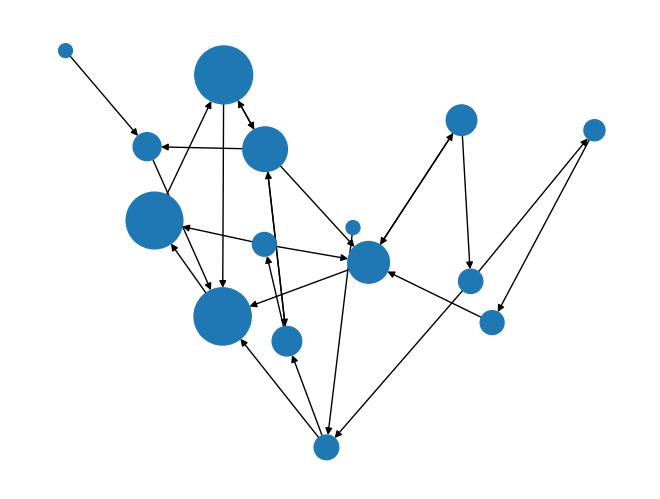

In [178]:
nx.draw(G, pos = nx.drawing.spring_layout(G), node_size = [s * 10000 for s in v.reshape((15,)).tolist()[0]])

**Вывод:** <br><br>
**Смысл матрицы 𝑀:** <br>
Матрица $M$ показывает вероятности переходов между страницами. Она построена на основе числа ссылок, отражая структуру графа. <br><br>
**Собственный вектор:** <br>
Вектор, соответствующий наибольшему собственному числу, показывает стационарное распределение вероятностей посещения страниц в модели Маркова. Вершины с более высоким значением имеют больший "вес" в структуре графа. <br><br>
**Почему именно этот собственный вектор:** <br>
Этот вектор отражает равновесное состояние системы, в котором вероятность нахождения на каждой странице остаётся неизменной при большом числе переходов. <br><br>
**Связь с марковскими процессами:** <br>
Алгоритм PageRank основан на случайном блуждании пользователя по графу. Матрица 𝑀 — это матрица переходов в марковской цепи, где состояния — страницы графа. <br><br>
**Роль параметра 𝑑:** <br>
Параметр 𝑑 учитывает вероятность случайного перехода на любую страницу, моделируя непредсказуемое поведение пользователя. Здесь 𝑑=1, так что все переходы определяются только ссылками.